<a href="https://colab.research.google.com/github/Gabriel-Menezes-Morais/Fictional-Retail-Analysis/blob/main/An%C3%A1lise_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Projeto hipotético cujo objetivo é: Ajudar uma empresa fictícia de varejo online a aumentar sua receita
#e otimizar suas campanhas de marketing através da análise aprofundada do comportamento de seus clientes e padrões de compra.

#Base de dados coletada do site ...
#Nome do Analista: Gabriel Menezes de Morais da Mata
#Linkedin:
#GitHub:

# Limpeza e Tratamento dos dados


In [ ]:
#Mudar os comentários para inglês

In [ ]:
#bibliotecas necessárias para a análise:

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Aqui, fazemos o download da base de dados
upl = files.upload()
df = pd.read_excel('Dados_Varejo.xlsx')


Saving Dados_Varejo.xlsx to Dados_Varejo.xlsx


In [ ]:
#Impressão de informações importantes, como contagem de valores ausentse e o tipo de cada variável
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Excluímos todas as linhas que contêm valores ausentes
df = df.dropna()

In [ ]:
df = df[df['Quantity'] >= 0] #deixamos somente as linhas onde não há retorno do produto

In [ ]:
df = df[df['UnitPrice'] != 0] #Excluímos as linhas onde o produto foi dado de graça, por efeito de promoção ou teste

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #Cria-se uma nova variável com o valor total de cada compra

In [ ]:
df['Country'] = df['Country'].replace('EIRE', 'Eire') #Muda-se o nome da categoria Eire, para que possa seguir a formatação estabelecida

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #Mudamos o tipo da variável InvoiceDate para datetime, assim, podemos lidar com ela facilmente

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month #cr

In [ ]:
df['Day'] = df['InvoiceDate'].dt.day

In [ ]:
df['Year'] = df['InvoiceDate'].dt.year

In [ ]:
df['TimeOfDay'] = df['InvoiceDate'].dt.time

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df['Count'] = 1

In [ ]:
df['WeekDay'] = df['InvoiceDate'].dt.day_name()

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,1,2010,08:26:00,8,1,Wednesday
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,1,2010,08:28:00,8,1,Wednesday
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,1,2010,08:28:00,8,1,Wednesday
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,1,2010,08:34:00,8,1,Wednesday


In [ ]:
#Download da Base de dados tratada
df.to_excel('Dados_Varejo_clean.xlsx', index=False)

files.download('Dados_Varejo_clean.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análise Descritiva e Visualização


In [ ]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Country,
United Kingdom,4256740
Netherlands,200361
Eire,140275
Germany,119261
France,111471
Australia,83901
Sweden,36083
Switzerland,30082
Spain,27940


In [ ]:
upl = files.upload()
df = pd.read_excel('Dados_Varejo(1).xlsx')

Saving Dados_Varejo(1).xlsx to Dados_Varejo(1).xlsx


In [ ]:
#Criação de uma base de dados sem a categoria United Kingdom
df_semUK = df.loc[df['Country'] != 'United Kingdom', ['Country', 'Quantity']]
df_semUK.head()

,Country,Quantity
26,France,24
27,France,24
28,France,12
29,France,12
30,France,24


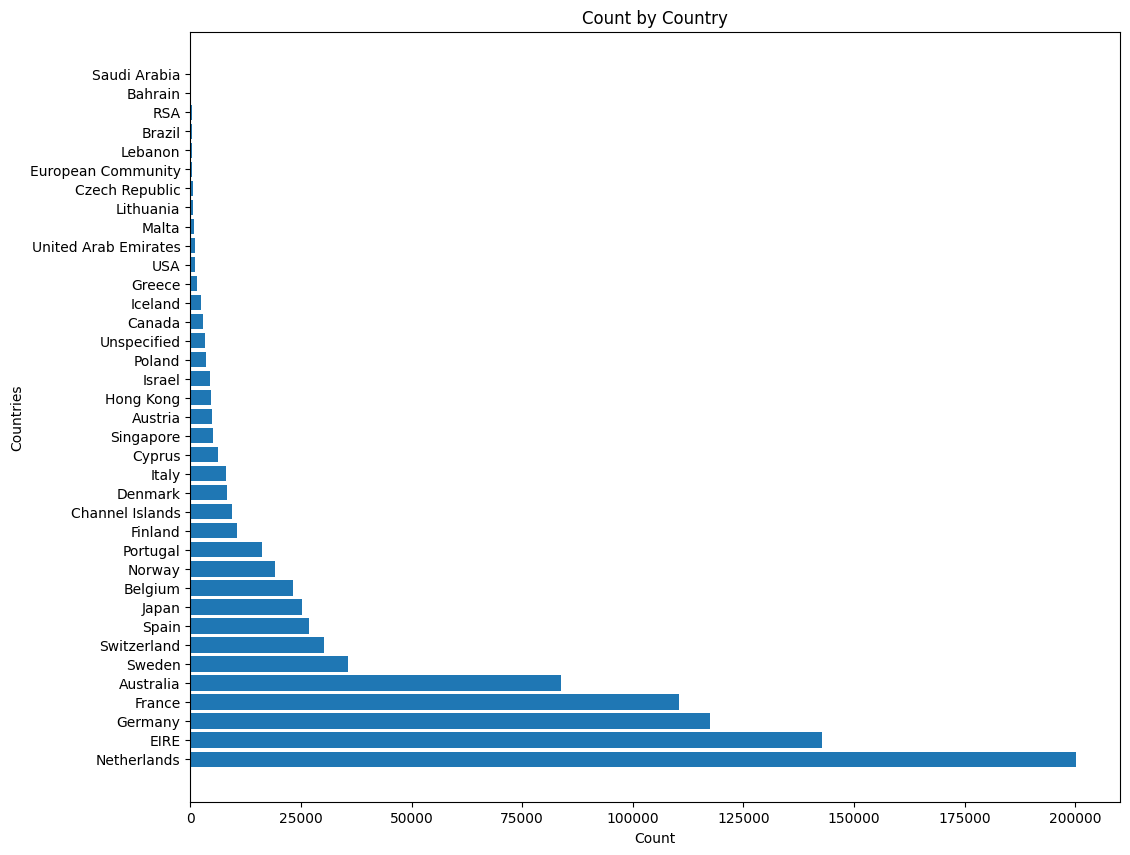

In [ ]:
#Total de vendas por país
fig, ax = plt.subplots(figsize=(12, 10))

plt.barh(df_semUK.groupby('Country')['Quantity'].sum().sort_values(ascending=False).index,
         df_semUK.groupby('Country')['Quantity'].sum().sort_values(ascending=False).values)

ax.set_xlabel('Count')
ax.set_ylabel('Countries')
ax.set_title('Count by Country')

plt.show()

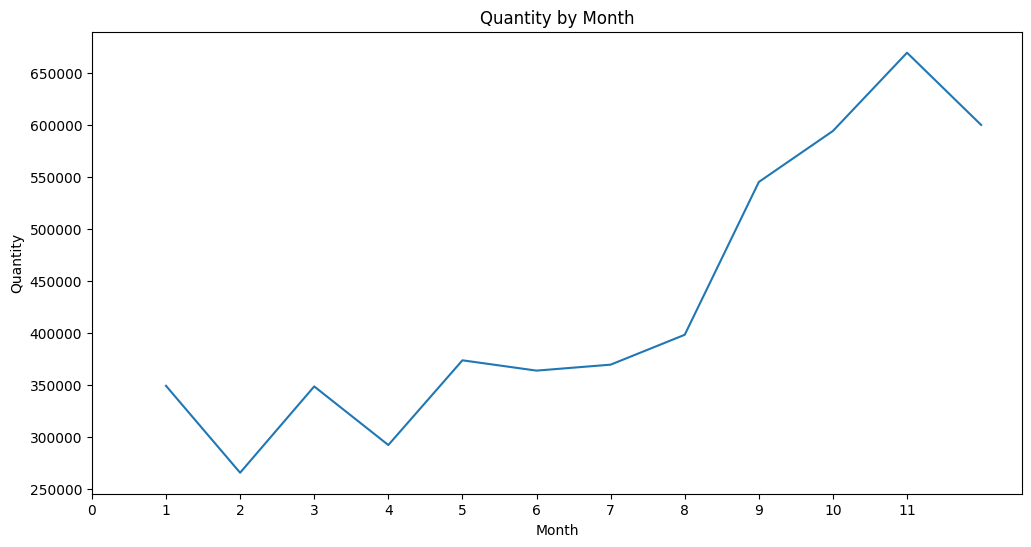

In [ ]:
#Qual o total de vendas por mês?
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby('Month')['Quantity'].sum()

plt.plot(df.groupby('Month')['Quantity'].sum().index, df.groupby('Month')['Quantity'].sum().values)

ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.set_title('Quantity by Month')

ax.set_xticks(range(0, 12, 1))

plt.show()

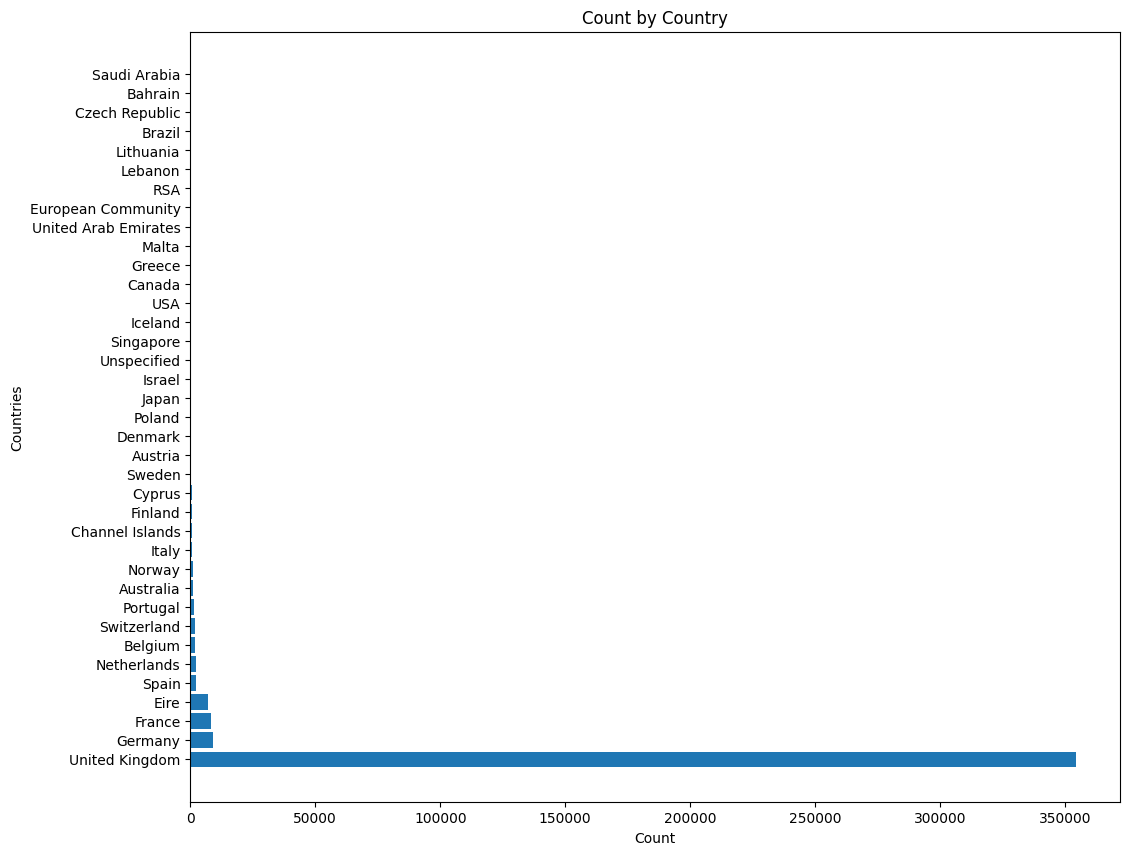

In [ ]:
#Barras verticais para verificação dos países mais imersivos
#De quais países vêm os clientes?
fig, ax = plt.subplots(figsize=(12, 10))

plt.barh(df['Country'].value_counts().index, df['Country'].value_counts().values)

ax.set_xlabel('Count')
ax.set_ylabel('Countries')
ax.set_title('Count by Country')

plt.show()

In [ ]:
df.groupby('Month')['TotalPrice'].sum()

,TotalPrice
Month,
1,569445.040
2,447137.350
3,595500.760
4,469200.361
5,678594.560
6,661213.690
7,600091.011
8,645343.900
9,952838.382


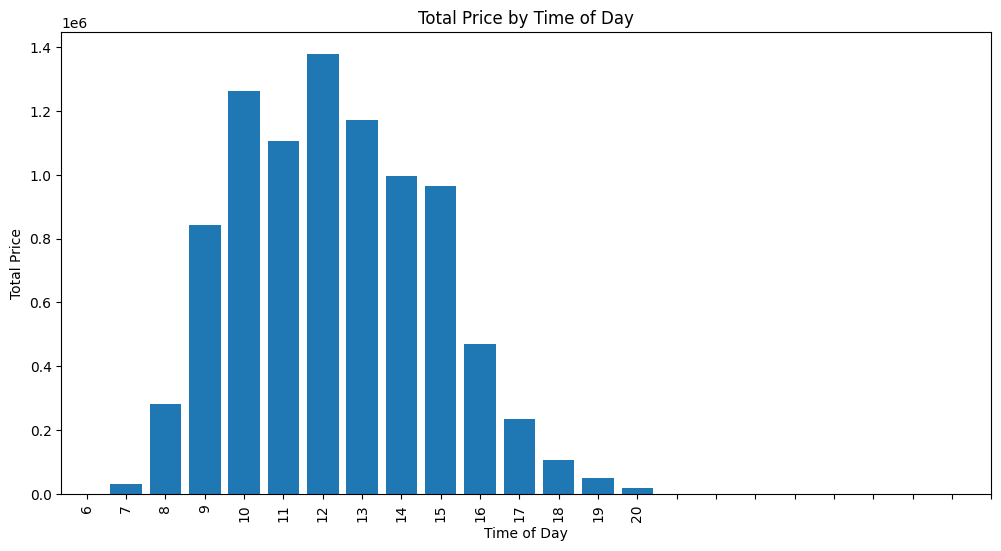

In [ ]:
#Qual a hora do dia com mais pedidos?
fig, ax = plt.subplots(figsize=(12, 6))

df.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', ax=ax, width=0.8)

ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Price')
ax.set_title('Total Price by Time of Day')

ax.set_xticks(range(0, 24, 1))

plt.show()

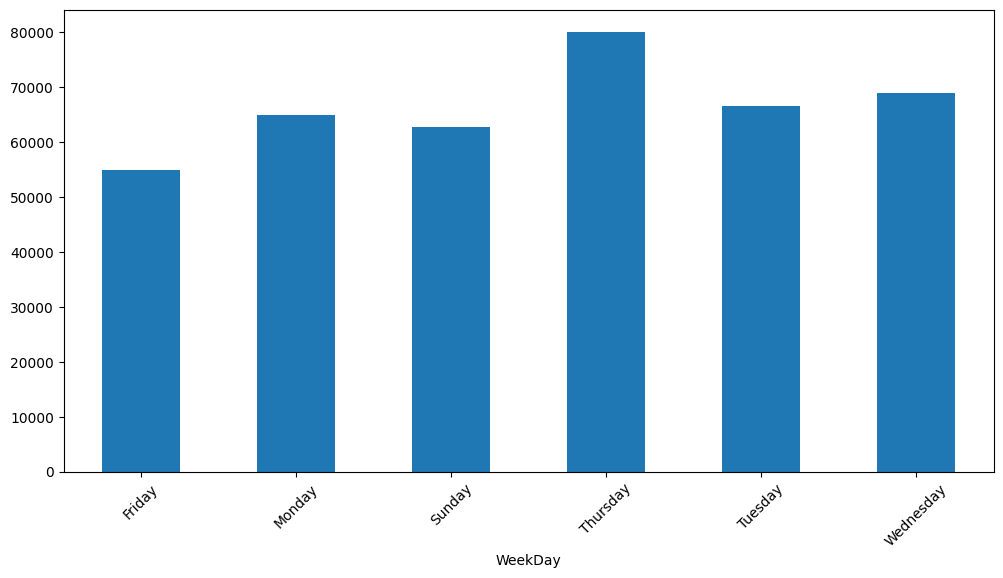

In [ ]:
#Qual o dia da semana com maior volume de vendas?
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('WeekDay')['Count'].sum().plot(kind='bar', ax=ax)

plt.xticks(rotation=45)

plt.show()

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month,Day,Year,Hour,Count
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.0
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,7.612475,15.042186,2010.934260,12.728202,1.0
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,1.000000,1.000000,2010.000000,6.000000,1.0
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,5.000000,7.000000,2011.000000,11.000000,1.0
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,8.000000,15.000000,2011.000000,13.000000,1.0
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,11.000000,22.000000,2011.000000,14.000000,1.0
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.000000,31.000000,2011.000000,20.000000,1.0
std,179.331775,NaN,22.097877,1713.141560,309.071041,3.416520,8.653746,0.247828,2.273519,0.0


In [ ]:
for column_name in df.columns:
  print(column_name)
  #nome das variáveis

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
TotalPrice
Month
Day
Year
TimeOfDay
Hour
Count
WeekDay


In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
Eire,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462


In [ ]:
#10 items mais vendidos
df_item = df['Description'].value_counts()

df_item.head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2028
REGENCY CAKESTAND 3 TIER,1723
JUMBO BAG RED RETROSPOT,1618
ASSORTED COLOUR BIRD ORNAMENT,1408
PARTY BUNTING,1396
LUNCH BAG RED RETROSPOT,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159
LUNCH BAG BLACK SKULL.,1105
POSTAGE,1099


In [ ]:
#10 produtos com maior receita
df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


# Segmentação de Clientes

In [ ]:
upl = files.upload()
df = pd.read_excel('Dados_Varejo_clean.xlsx')

Saving Dados_Varejo_clean.xlsx to Dados_Varejo_clean.xlsx


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeOfDay,Hour,Count,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,2010,08:26:00,8,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,2010,08:26:00,8,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,2010,08:26:00,8,1,Wednesday


In [ ]:
#A baixo, utilizaremos a técnica split-apply-combine para segmentar a base de dados no modelo RFM

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
print(reference_date)

2011-12-10 12:50:00


In [ ]:
recency_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
    }).rename(columns = {'InvoiceDate': 'Recency'})

recency_df.head()

,Recency
CustomerID,
12346,326
12347,2
12348,75
12349,19
12350,310


In [ ]:
frequency_df = df.groupby('CustomerID').agg(
    {'InvoiceNo' : 'nunique'}
).rename(columns = {'InvoiceNo': 'Frequency'})

frequency_df.head()

,Frequency
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [ ]:
Monetary_df = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum'
}).rename(columns = {'TotalPrice': 'Monetary'})

Monetary_df.head()

,Monetary
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
